IMPLEMENTATION OF NEURAL NETWORK FROM SCRATCH USING NUMPY

In [4]:
#data set

#A
a = [0, 0, 1, 1, 0, 0,
     0, 1, 0, 0, 1, 0,
     1, 1, 1, 1, 1, 1,
     1, 0, 0, 0, 0, 1,
     1, 0, 0, 0, 0, 1]
#B
b = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0]
#C
c = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 1, 1, 1, 0]

In [5]:
#creating labels
y=[[1,0,0],
   [0,1,0],
   [0,0,1]]

In [6]:
import numpy as np
import matplotlib.pyplot as plt

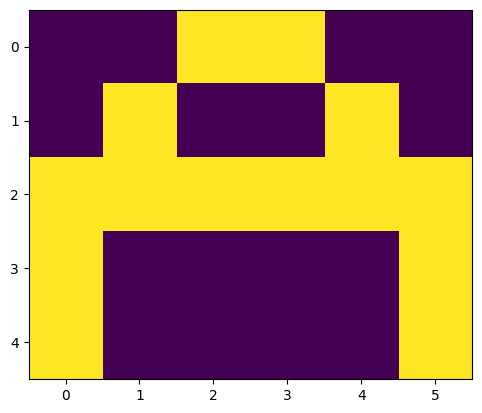

In [7]:
#visulatize the data
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [58]:
#convert data and labels into numpy array
x = [np.array(a).reshape(1,30), np.array(b).reshape(1,30), np.array(c).reshape(1,30)]

y = np.array(y)

print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [9]:
#input (1,30)
#hidden(1,5)
#output(3,3)

In [11]:
#activation function

def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [12]:
#creating feed forward NN

def f_forward(x, w1, w2):
    #hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)

In [31]:
#initialize the weights

def generate_wt(x,y):
    l = []
    for i in range(x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))

In [32]:
def loss(out, Y):
    s = (np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

In [65]:
#back propagation

def back_prop(x,y,w1,w2,alpha):

    #hidden
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = (a2-y)
    d1 = np.multiply(w2.dot(d2.transpose()).transpose(), np.multiply(a1, 1 - a1))

    #gradient
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    w1 = w1 -(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))

    return (w1,w2)

In [52]:
def train(X, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_values = []
    for j in range(epoch):
        l = []
        for i in range(len(X)):
            out = f_forward(X[i], w1, w2)
            l.append(loss(out, Y[i]))
            w1, w2 = back_prop(X[i], Y[i], w1, w2, alpha)
        print("Epochs:", j+1, "acc:", (1 - (sum(l) / len(X))) * 100)
        acc.append(1 - (sum(l) / len(X)) * 100)
        loss_values.append(sum(l) / len(X))
    return acc, loss_values, w1, w2

In [55]:
def predict(x, w1, w2):
    out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(out[0])):
        if maxm < out[0][i]:
            maxm = out[0][i]
            k = i
    if k == 0:
        print("Image is of letter A")
    elif k == 1:
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [56]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1, "\n|", w2)

[[-0.74632193  0.30177978  0.73848853  0.81179594  0.18660128]
 [-0.68104895 -0.49873718 -1.66571049  0.66057129  1.48362629]
 [ 0.80966401  2.31087153  0.44739082 -0.04579245  0.07993201]
 [-0.03601122  2.03379789  0.32812528 -1.41751862 -0.88967365]
 [-0.13554243 -0.45140721  1.66949073 -0.43872579 -0.70652164]
 [ 0.08502426  0.0419471   0.34943669 -0.5053321   0.74739412]
 [-0.81067134 -1.03955656  0.53868358 -0.8263015   0.5470023 ]
 [-0.12522114  0.32072919 -0.68261535 -0.90997689  0.66529681]
 [ 0.99225169 -1.15420901 -0.2139767  -1.40240431 -0.55121232]
 [-0.65054457 -1.62352036 -2.81480972 -2.5045838   0.38897979]
 [ 0.53670206  1.69886645  0.76521366 -1.1633231  -0.72799142]
 [ 0.94780483  0.33657184  0.5490117   2.14802876  1.27172717]
 [ 0.33391211 -0.82015777 -0.96989946  1.02794038  0.51769392]
 [ 1.46194123  1.39667122 -0.81623603  0.38414718  0.07542257]
 [ 0.65620251  0.10959114 -1.01992909  0.04351363 -0.89938438]
 [-1.20520141  0.91866989 -0.96118462 -0.49788363  2.77

In [66]:
acc, loss_values, w1, w2 = train(x, y, w1, w2, 0.1, 100)

Epochs: 1 acc: 71.01917215181726
Epochs: 2 acc: 72.44314879184554
Epochs: 3 acc: 73.82848829581307
Epochs: 4 acc: 75.41104056015942
Epochs: 5 acc: 77.15652096629006
Epochs: 6 acc: 78.68800068074744
Epochs: 7 acc: 79.8594898613558
Epochs: 8 acc: 80.73784151986845
Epochs: 9 acc: 81.41478779943088
Epochs: 10 acc: 81.96149542887989
Epochs: 11 acc: 82.42622591942599
Epochs: 12 acc: 82.83956798552775
Epochs: 13 acc: 83.21989656919638
Epochs: 14 acc: 83.57765683179304
Epochs: 15 acc: 83.91845784714293
Epochs: 16 acc: 84.24519030744274
Epochs: 17 acc: 84.55937526371156
Epochs: 18 acc: 84.86193855026065
Epochs: 19 acc: 85.15359778888964
Epochs: 20 acc: 85.43502156026217
Epochs: 21 acc: 85.70687470382371
Epochs: 22 acc: 85.96981734305427
Epochs: 23 acc: 86.22449100813007
Epochs: 24 acc: 86.47150526136916
Epochs: 25 acc: 86.7114286559473
Epochs: 26 acc: 86.94478409485735
Epochs: 27 acc: 87.17204756433644
Epochs: 28 acc: 87.39364914108198
Epochs: 29 acc: 87.60997539306584
Epochs: 30 acc: 87.821372

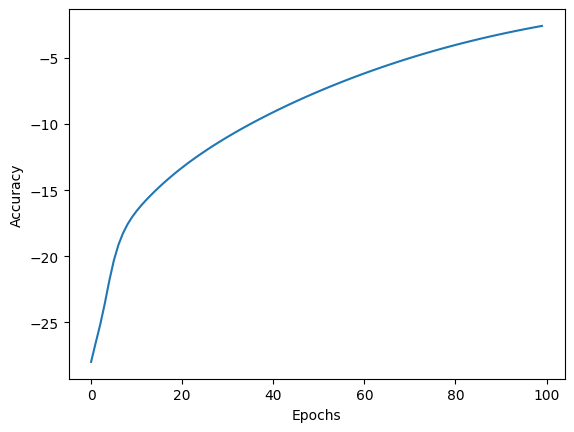

In [68]:
import matplotlib.pyplot as plt1

#plotting accuracy
plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt1.show()

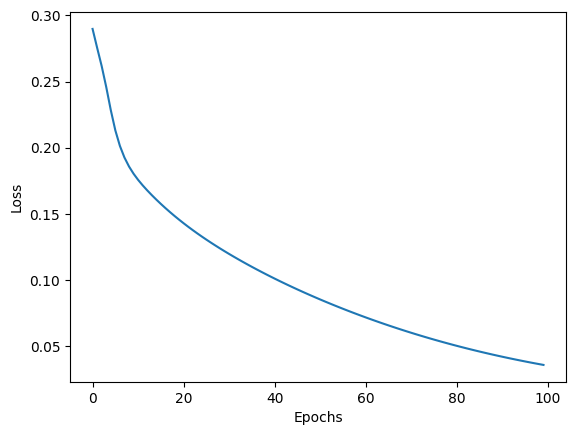

In [73]:
#plot loss

plt1.plot(loss_values)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt1.show()

In [74]:
print(w1, '\n',w2)

[[-0.74632193  0.30177978  0.73848853  0.81179594  0.18660128]
 [-0.65783837 -0.50029426 -1.45030898  1.05958225  1.46316663]
 [ 1.08292455  2.31012577  0.66443745  0.33935702 -0.25793193]
 [ 0.23724931  2.03305213  0.54517191 -1.03236916 -1.22753759]
 [-0.11233184 -0.45296428  1.88489225 -0.03971482 -0.7269813 ]
 [ 0.08502426  0.0419471   0.34943669 -0.5053321   0.74739412]
 [-0.81067134 -1.03955656  0.53868358 -0.8263015   0.5470023 ]
 [ 0.14803939  0.31998343 -0.46556872 -0.52482742  0.32743288]
 [ 0.99225169 -1.15420901 -0.2139767  -1.40240431 -0.55121232]
 [-0.65054457 -1.62352036 -2.81480972 -2.5045838   0.38897979]
 [ 0.85987423  1.6996028   0.66413475 -1.93676034 -0.76045818]
 [ 0.94780483  0.33657184  0.5490117   2.14802876  1.27172717]
 [ 0.58396206 -0.81934646 -0.96825435  1.01407888  0.20028965]
 [ 1.73520176  1.39592546 -0.5991894   0.76929664 -0.26244137]
 [ 0.97937468  0.11032748 -1.121008   -0.7299236  -0.93185114]
 [-0.88202923  0.91940623 -1.06226353 -1.27132086  2.74

Image is of letter C


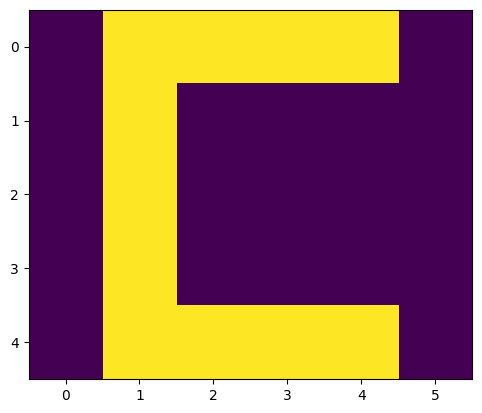

In [75]:
predict(x[2],w1,w2)

Image is of letter B


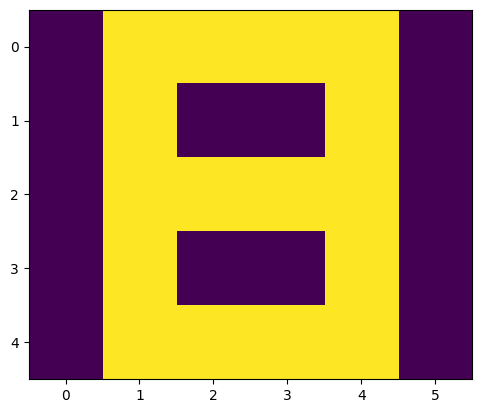

In [76]:
predict(x[1],w1,w2)

Image is of letter A


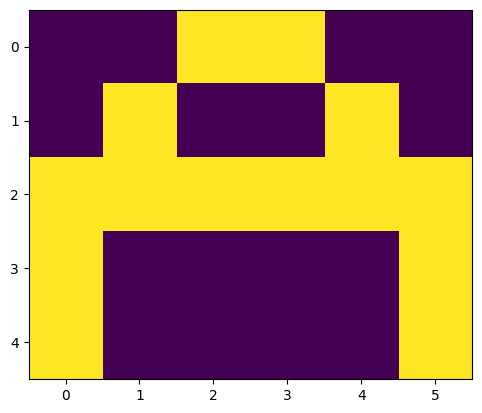

In [77]:
predict(x[0],w1,w2)